In [1]:
import numpy as np
import sympy as sym
sym.init_printing()

In [2]:
time, freq, g, ky = sym.symbols('t f g k_y', real=True, positive=True)
t1, t2 = sym.symbols('t_1 t_2', real=True, positive=True)

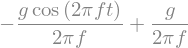

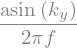

In [80]:
a = sym.sin(freq*2*sym.pi*time)
vo = g/2/sym.pi/freq#sym.symbols('v_o')#g*2*sym.pi
v = g*sym.integrate(a, time) + vo
t1 = sym.simplify(sym.solve(a-ky, time)[1])
display(a,v,t1)

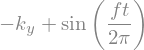

In [69]:
a-ky

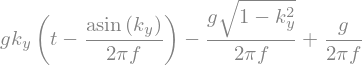

In [81]:
vb = g*ky*(time-t1) + v.subs(time, t1)
# vb = m(x-x1) + y1
display(vb)

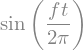

In [72]:
a

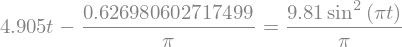

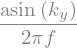

In [86]:
equation = sym.Eq(vb, v).subs(g, 9.81).subs(freq, 1).subs(ky, 0.5)
display(sym.simplify(equation))
t2 = sym.nsolve(equation, time, 2*np.pi)
display(t1,t2)

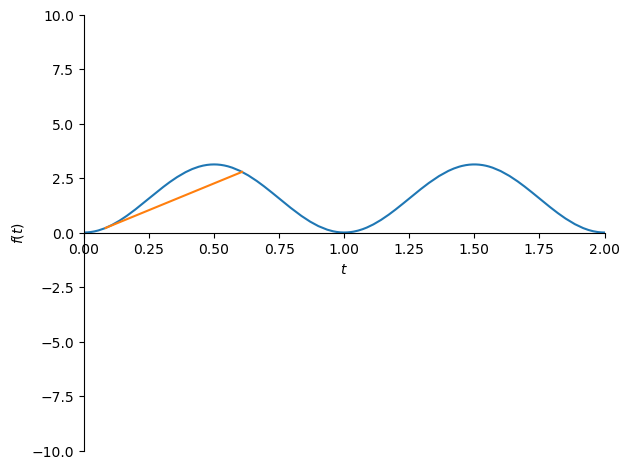

In [87]:
tmax = 2
p1 = sym.plot(v.subs(g, 9.81).subs(freq, 1), (time, 0, tmax),xlim=(0, tmax), ylim=(-10, 10), show=False)
p2 = sym.plot(vb.subs(g, 9.81).subs(freq, 1).subs(ky, 0.5), (time, t1.subs(freq, 1).subs(ky, 0.5), t2), show=False)
# p3 = sym.plot(a.subs(freq,1), (time, 0, 20*np.pi), show=False)
p1.extend(p2)
# p1.extend(p3)
p1.show()

In [14]:
def create_harmonic_input_files(freq, resolution, cycles=5):
    duration = cycles/freq
    t = np.linspace(0, duration, int(duration*resolution*cycles))
    a = np.sin(np.pi*2*freq*t)
    data = np.column_stack((t, a))
    np.savetxt(f'sample_ground_motions/sine_{freq}_Hz_{resolution*freq}_sps.csv', data, delimiter=',', header=f'# Time Series: {freq} Hz sine wave \n # Time (s),Acceleration (g)')
